<a href="https://colab.research.google.com/github/MikelKN/new-phd-with-rawat/blob/main/Version%202.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the data

# Version 2: updating with feedback from MilanLP and Rick

Followig the reviews from the Coding Apperitivo, the main suggestion was to consider using similar datasets from the same sources and gernes so as to adress the huge discrepancies in the mean word length between both datasets.


So the plan is to use either social media-social media content- from twitter.

Datasets 1- hate speech : https://arxiv.org/abs/2404.17874 - MANUEL Tonneau

Dataset 2-fake news : https://www.unb.ca/cic/datasets/truthseeker-2023.html

(https://www.kaggle.com/datasets/sudishbasnet/truthseekertwitterdataset2023?select=Twitter+Analysis.csv)

## reference for fake news dataset:

S. Dadkhah, X. Zhang, A. G. Weismann, A. Firouzi and A. A. Ghorbani, "The Largest Social Media Ground-Truth Dataset for Real/Fake Content: TruthSeeker," in IEEE Transactions on Computational Social Systems, 99. 1-15, Oct. 2023.


## reference for hate speech dataset:

Tonneau, M., Liu, D., Fraiberger, S., Schroeder, R., Hale, S. A., & Röttger, P. (2024). From Languages to Geographies: Towards Evaluating Cultural Bias in Hate Speech Datasets. arXiv preprint arXiv:2404.17874.


# Version update 3: Following Rick and Marcel's Feedbcaks

- Do not restrict the length of the text you are trying to study
- Fake news? Use more news data to compensate the fake tweets data you currently have. First assess your model on another fake news and hate speech dataset and make some inference on those.
- Find a way to define the kind of correlation i am getting- establish a benchmarck for correlation.
- Update the prompt to something more scholarly
- Leverage LLMS for the classifications
- Look into T-SNE/ Dimensionality reduction.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
import os
import pandas as pd
pd.options.display.max_colwidth = 500
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["NEW_OPEN_AI"] = userdata.get("NEW_OPEN_AI")
os.environ["HF_API_KEY"] = userdata.get("HF_API_KEY")
os.environ["COHERE_PROD"] = userdata.get("COHERE_PROD")

import kaggle
#datasets from kaggle
!kaggle datasets download -d elgringofrances/english-hate-speech-superset
!kaggle datasets download -d sudishbasnet/truthseekertwitterdataset2023
!kaggle datasets download -d saurabhshahane/fake-news-classification

!unzip english-hate-speech-superset.zip
!unzip truthseekertwitterdataset2023.zip
!unzip fake-news-classification.zip

!git clone https://github.com/MikelKN/abbreviation-list-english.git

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/elgringofrances/english-hate-speech-superset
License(s): MIT
 83% 19.0M/22.8M [00:00<00:00, 76.3MB/s]
100% 22.8M/22.8M [00:00<00:00, 80.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/sudishbasnet/truthseekertwitterdataset2023
License(s): unknown
 93% 30.0M/32.2M [00:00<00:00, 103MB/s] 
100% 32.2M/32.2M [00:00<00:00, 92.9MB/s]
Archive:  english-hate-speech-superset.zip
  inflating: en_hf_102024.csv        
Archive:  truthseekertwitterdataset2023.zip
  inflating: Truth_Seeker_Model_Dataset.csv  
  inflating: Twitter Analysis.csv    
  inflating: readme.txt              
Cloning into 'abbreviation-list-english'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 181.29 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!kaggle datasets download -d saurabhshahane/fake-news-classification
!unzip fake-news-classification.zip

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 90.0M/92.1M [00:00<00:00, 143MB/s]
100% 92.1M/92.1M [00:00<00:00, 137MB/s]
Archive:  fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


In [5]:
fake_df = pd.read_csv('WELFake_Dataset.csv')
fake_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],"No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called Sunshine. She has a radio blog show hosted from Texas called, Sunshine s F***ing Opinion Radio Show. A snapshot ...",1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",1
3,3,"Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid","A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while wa...",0
4,4,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled chilling pictures of its largest ever nuclear missile, capable of destroying an area the size of Fra...",1


In [4]:
fake_data = pd.read_csv('Truth_Seeker_Model_Dataset.csv')
only_fake = fake_data[(fake_data['3_label_majority_answer'] == 'Agree') & (fake_data['5_label_majority_answer'] == 'Agree')]

print(f"The shape of the entire dataset is {fake_data.shape} while that of the only agree is {only_fake.shape}")



(54335, 9)

## Import librabires and preprocess


In [2]:
!pip install emoji num2words contractions tqdm fire --quiet
!pip install --upgrade openai cohere transformers --quiet
!pip install -U kaleido --quiet #to print and save the sankey charts

import transformers
from transformers import pipeline, AutoTokenizer

import warnings
warnings.filterwarnings('ignore')

#NLTK Lib
import nltk
nltk.download('all', quiet=True)
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
stopwords_list = set(stopwords.words("english"))

from num2words import num2words
from openai import OpenAI
from tqdm import tqdm
from pathlib import Path
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import time
import logging
import fire

import random
import torch
import emoji
import re
import time
import contractions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import gensim.downloader as api
import plotly.graph_objects as go
import torch.nn.functional as F
from torch.nn.functional import softmax

pd.options.display.max_colwidth = 500 # limit to the lenght of token that should be displayed on the daatsets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.1/456.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 28.9 MB/s eta 0:00:00


#Datasets reading and preprocessing

In [3]:
fake_df = pd.read_csv('/content/Truth_Seeker_Model_Dataset.csv')
hate_df = pd.read_csv('/content/en_hf_102024.csv')

class Preprocessor:
    def __init__(self):
        self.patterns= {
            "multi_space": r' +',
            "user_mention": r'@\w+',
            "new_line": r'\n+',
            "hyperlink": r'https?://\S+|www\.\S+',
            "accented": r'\^[a-zA-Z0-9]+',
            "date": r'\b(?:\d{1,2}(?:st|nd|rd|th)?\s(?:Jan|Feb|Mar|...|Dec)[a-z]*\s?\d{4}?)\b',
            "time": r'\b\d{1,2}:\d{2}(?::\d{2})?\s?(?:[aApP][mM])?\b',
            "special_characters": r'[_"\-%;()|+&=*%.,!?:#$@[\]/]',
            "numbers": r'\d+',
            "amper_begin_pattern" : r'^',
            "punctuations" : r'[^\w\s]'
        }
    def expand_abbrev_profanity(self, profanity_df, text):
        for _, row in profanity_df.iterrows():
            abbr = row['abbrv']
            long = row['long']
            text = re.sub(rf'\b{re.escape(abbr)}\b', long, text, flags=re.IGNORECASE)
        return text

    def convert_emojis(self, text):
        return emoji.demojize(text).replace(":", "")

    def number_to_words(self, match):
        return num2words(int(match.group()))

    def process_nums(self, text):
        return re.sub(r'\d+', self.number_to_words, text)

    def remove_stopwords(self, text):
        word_tokens = word_tokenize(text)
        return ' '.join([word for word in word_tokens if word not in stopwords_list])

    # Function to get POS tag for lemmatization
    def get_wordnet_pos(self,word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {
            'J': wordnet.ADJ,
            'N': wordnet.NOUN,
            'V': wordnet.VERB,
            'R': wordnet.ADV }
        return tag_dict.get(tag, wordnet.NOUN)

    # Function to lemmatize text
    def lemmatize_text(self,text):
        tokens = word_tokenize(text.lower())
        lemmatized_tokens = [lemmatizer.lemmatize(word, self.get_wordnet_pos(word)) for word in tokens if word.isalpha()]
        return ' '.join(lemmatized_tokens)

    def text_preprocessing(self, text):
        text = re.sub(self.patterns["date"], '', text)
        text = re.sub(self.patterns["time"], '', text)
        text = self.convert_emojis(text)
        text = re.sub(self.patterns["hyperlink"], '', text)
        text = re.sub(self.patterns["user_mention"], '', text)
        text = re.sub(self.patterns["new_line"], ' ', text)
        text = re.sub(self.patterns["amper_begin_pattern"], '', text)
        text = contractions.fix(text)
        text = self.lemmatize_text(text)
        text = re.sub(self.patterns["multi_space"], ' ', text)
        text = re.sub(self.patterns["special_characters"], ' ', text)
        text = self.process_nums(text)
        text = re.sub(self.patterns["accented"], '', text)
        text = self.remove_stopwords(text)
        text = re.sub(self.patterns["punctuations"], '', text)
        text = text.lower()
        return text.strip()

## read dataset abd apply sentiment and emotion analysis


Device set to use cuda:0


the shape of the hate speech is (77689, 7), while that of the fake news datasets is (134198, 9)

The shape of the hate dataset is (50, 2) while that of the fake dataset is (50, 2)


Emotion analysis

plotting the emotion distribution


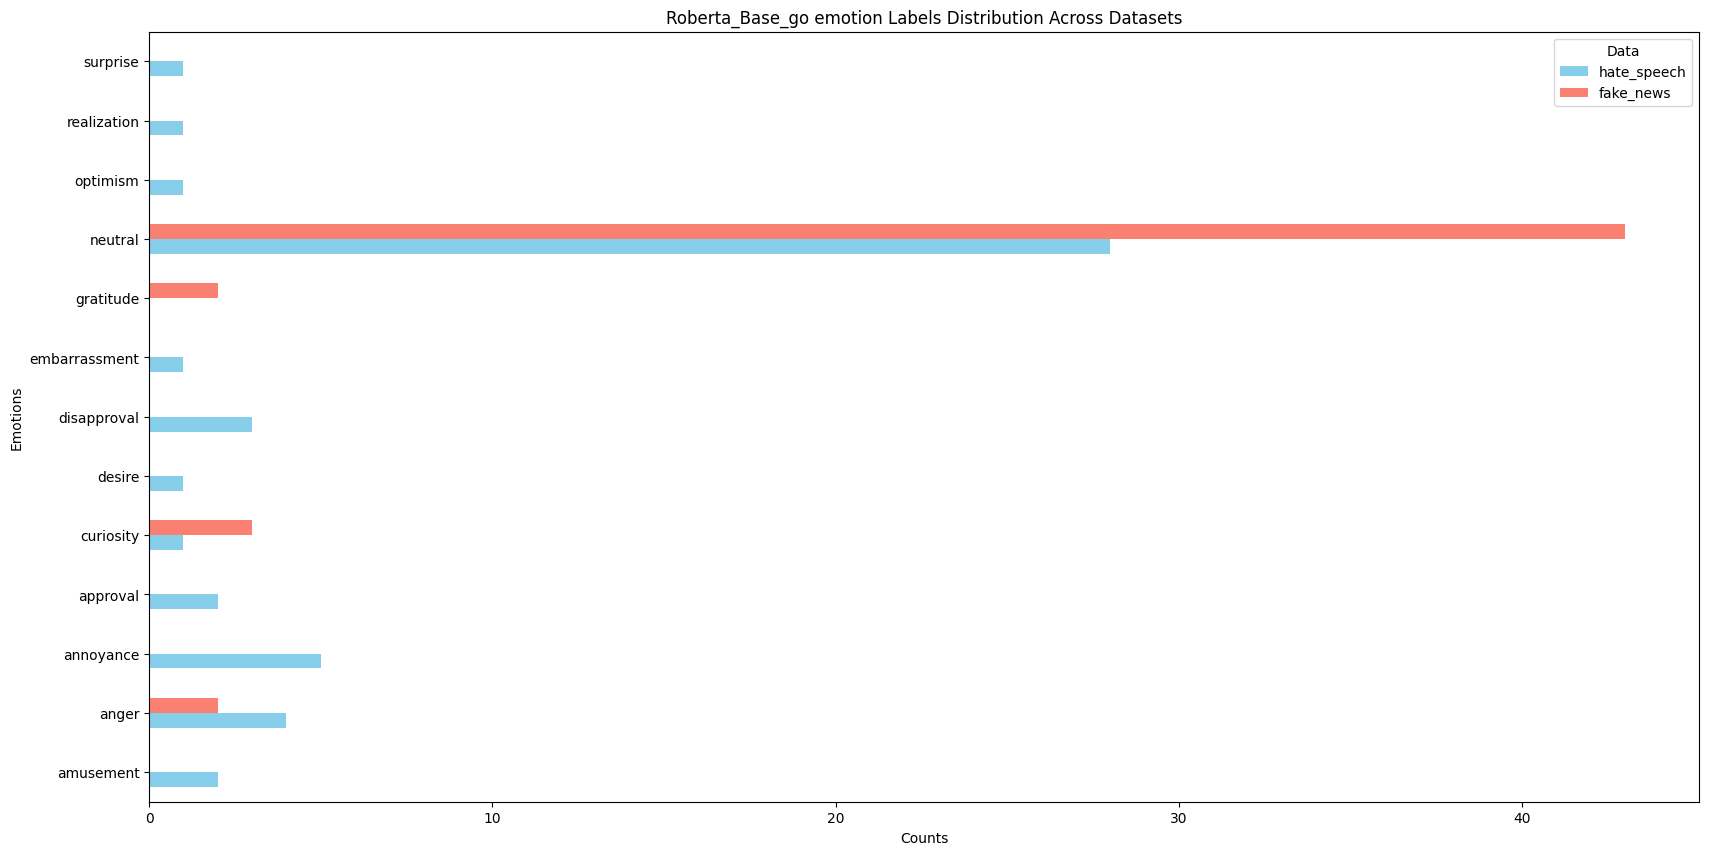


plotting the sankey charts




Starting sentiment analysis!


Plotting the sentiment distribution


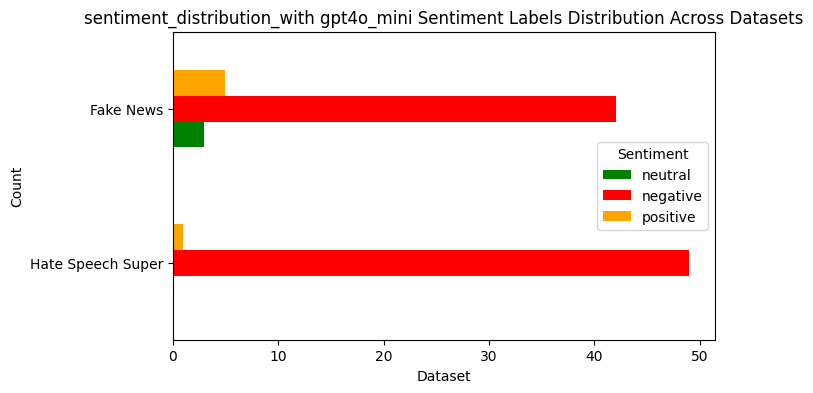


text cleaning and preprocessing!


plotting the mean word length for both datasets



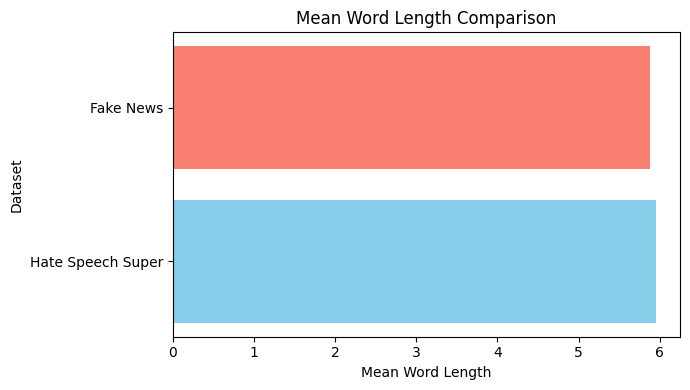


preprocessing and calculating cosine similarity



Average Cosine Similarity(in persentage):11.51%





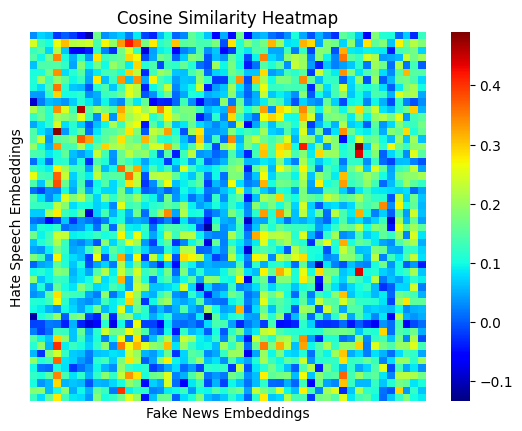

In [5]:
#output path to save the images
path = Path('/content/drive/MyDrive/PhD with Rawat/obj1_d1')
class Read:
    @staticmethod
    def read_and_filter_dataset (filepath, text_column):
        data = pd.read_csv(filepath, low_memory=False)
        data.dropna(inplace=True)
        # data = data[data[text_column].str.len() <= max_length]
        return data

class PlotUtils:
    def __init__(self, colors= ['green', 'red', 'orange', 'blue'], figsize=(7, 4)):
        self.figsize = figsize
        self.colors = colors
    def plot_sentiment_distribution(self, sentiment_columns, dataset_names, image_name, model_name):
        unique_sentiments = set()
        sentiment_counts_list = []
        for sentiment_column in sentiment_columns:
          sentiment_column_normalized = sentiment_column.str.lower()
          sentiment_counts = sentiment_column_normalized.value_counts()# Count the sentiment labels for each dataset
          sentiment_counts_list.append(sentiment_counts)
          unique_sentiments.update(sentiment_counts.index)
        sentiment_df = pd.DataFrame({
            sentiment : [sentiment_count.get(sentiment, 0) for sentiment_count in sentiment_counts_list]
            for sentiment in unique_sentiments
        })
        sentiment_df.index = dataset_names
        sentiment_df.plot(kind='barh', stacked=False, figsize=self.figsize, color=self.colors[:len(unique_sentiments)])
        plt.title(f'{model_name} Sentiment Labels Distribution Across Datasets')
        plt.xlabel('Dataset')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.legend(title="Sentiment", loc='best')
        plt.savefig(path/image_name)
        plt.show()

class LLM_sentiment:
    def sentiment_gpt(self, event, model_name= 'gpt-4o-mini'):
      prompt = f"Given the following event: '{event}', identify the primary sentiment it evokes. \
      Select only one of the following sentiment labels (in lowercase): 'positive', 'negative', or 'neutral'. \
      Provide only the sentiment label without any additional explanation."

      client = OpenAI(
          api_key = userdata.get("NEW_OPEN_AI"),
          )
      input = [{"role": "system", "content": "You are a helpful assistant."},
              {"role": "user","content": prompt,}]
      chat_completion = client.chat.completions.create(
          messages=input,
          model=model_name,
      )
      output = chat_completion.choices[0].message.content
      return output

    def prompt_cohere(self, event, model_name= 'command'):

      prompt = f"Given the following event: '{event}', identify the primary sentiment it evokes. \
      Select only one of the following sentiment labels (in lowercase): 'positive', 'negative', or 'neutral'. \
      Provide only the sentiment label without any additional explanation."

      co_api = cohere.Client('cohere_api_key')
      response = co_api.chat(
          message=prompt_ngo,
          model=model_name,
      )
      return response.text

class BERTemotion:
      # reference https://huggingface.co/SamLowe/roberta-base-go_emotions
    def __init__(self,  max_length = 512, batch_size = 10, figsize=(20, 10),
                 emotions_color = None,  sent_model_name="SamLowe/roberta-base-go_emotions"):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.max_length = max_length
        self.figsize=figsize
        self.batch_size = batch_size
        self.tokenizer = AutoTokenizer.from_pretrained(sent_model_name)
        self.classifier = pipeline(task="text-classification",
                                   model=sent_model_name,
                                   top_k=True,
                                   device=0 if torch.cuda.is_available() else -1)
        self.emotion_colors = {
                  "admiration": "gold",
                  "anger": "cadetblue",
                  "approval": "orange",
                  "caring": "pink",
                  "curiosity": "darkviolet",
                  "desire": "cornflowerblue",
                  "disappointment": "bisque",
                  "disapproval": "moccasin",
                  "disgust": "silver",
                  "love": "turquoise",
                  "neutral": "tomato",
                  "optimism": "yellow",
                  "sadness": "pink"
                  }
    def predict(self, texts):
        truncated_texts = [
            self.tokenizer.decode(
                self.tokenizer(text, truncation=True, max_length=self.max_length)['input_ids'])
            for text in texts
        ]

        # batch processing for better GPU efficiency
        model_outputs = self.classifier(truncated_texts, batch_size=self.batch_size)
        results = []
        for output in model_outputs:
            top_emotion = output[0]
            results.append({
                "emotion": top_emotion['label'],
                "emotion_score": top_emotion['score']
            })
        return results
    def plot_emotion_distribution(self, emotion_columns, dataset_names, image_name, model_name='Roberta_Base_go'):
          if len(emotion_columns) != len(dataset_names):
              raise ValueError("The number of emotion labels and names must match.")
          emotion_dict = {name: emotion_column.value_counts() for name, emotion_column in zip(dataset_names, emotion_columns)}
          emotion_df = pd.DataFrame(emotion_dict).fillna(0).sort_index()
          emotion_df.plot(kind='barh', stacked=False, figsize=self.figsize, color=['skyblue', 'salmon'])
          plt.title(f'{model_name} emotion Labels Distribution Across Datasets')
          plt.ylabel('Emotions')
          plt.xlabel('Counts')
          plt.legend(title="Data", loc='best')
          # plt.savefig(path/image_name)
          plt.show()

    def emotion_counts(self, data):
      return data.value_counts().to_dict()

    def create_sankey_chart(self, data, dataset_name, image_name):
        emotion_count_dict = self.emotion_counts(data)
        all_emotions = list(emotion_count_dict.keys())
        nodes = all_emotions + [dataset_name]
        node_indices = {node: idx for idx, node in enumerate(nodes)}
        links = {
            "source": [],
            "target": [],
            "value": [],
            "color": []
        }
        for emotion, count in emotion_count_dict.items():
            links["source"].append(node_indices[emotion])
            links["target"].append(node_indices[dataset_name])
            links["value"].append(count)
            links['color'].append(self.emotion_colors.get(emotion.lower(), "gray"))
        fig = go.Figure(go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=nodes),
            link=dict(
                source=links["source"],
                target=links["target"],
                value=links["value"],
                color=links["color"])
        ))
        fig.update_layout(title_text=f"Emotion Flow for {dataset_name}", font_size=10)
        # fig.write_image(path/image_name)
        fig.show()

class Analysis:
    def __init__(self, colors= ['skyblue', 'salmon', 'green', 'red', 'orange', 'blue' ], figsize = (7, 4)):
        self.figsize = figsize
        self.colors = colors

    def exploratory_data_analysis(self, data, text_column):
        data['length'] = data[text_column].str.len()
        data['word_count'] = data[text_column].str.split().str.len() if text else 0 #num of words in sentence
        # data[text_column].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
        # data['mean_word_length'] = data[text_column].apply(
        #     lambda x: np.mean([len(word) for word in str(x).split() if word])
        #     if pd.notnull(x) else 0)
        data['mean_word_length'] = data[text_column].apply(
            lambda x: np.mean([len(word) for word in str(x).split() if word])) if text_column else 0

        return data

    def plot_mean_word_length(self, datasets, dataset_names, image_name):
        mean_word_counts = [dataset['word_count'].mean() for dataset in datasets]
        results_df = pd.DataFrame({
            "Dataset": dataset_names,
            "Mean Word counts": mean_word_counts
        })
        plt.figure(figsize=self.figsize)
        plt.barh(results_df["Dataset"], results_df["Mean Word counts"], color=self.colors[:len(dataset_names)])
        plt.ylabel("Dataset")
        plt.xlabel("Mean Word counts")
        plt.title("Mean Word counts Comparison")
        plt.tight_layout()
        plt.savefig(f"{image_name}.png")
        plt.show()

'''This is the chosen model to calculate the fake news and hate speech embeddings. see https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
It is a sentence transformer types, Model size is small, manageable and memory efficient, currently very hot in the community with 69M monthly downloads,
performs well on pair classification and STS task'''

class AllCosineSimilarity:
    def __init__ (self, batch_size = 5, model_name= "sentence-transformers/all-MiniLM-L6-v2"):
      self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      self.tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
      self.model = transformers.AutoModel.from_pretrained(model_name).to(self.device)
      self.batch_size = batch_size

    #Mean Pooling - Take attention mask into account for correct averaging
    def mean_pooling(self, model_output, attention_mask):
      token_embeddings = model_output[0] #First element of model_output contains all token embeddings
      input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
      return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def tokenize_text(self, data):
      if isinstance(data, pd.Series):
          data = data.tolist()
      return self.tokenizer(
          data,
          truncation=True,
          padding=True,
          max_length=512,
          return_tensors="pt"
      )

    def compute_embeddings(self, tokenized_input):
        tokenized_input = {k: v.to(self.device) for k, v in tokenized_input.items()}
        with torch.no_grad():
            model_output = self.model(**tokenized_input)
        embeddings = self.mean_pooling(model_output, tokenized_input['attention_mask'])
        return embeddings

    def normalize_embeddings(self, embeddings):
      return F.normalize(embeddings, p=2, dim=1)

    def calculate_cosine_similarity(self, hate_embeddings, fake_embeddings):
      return hate_embeddings @ fake_embeddings.T

    def visualize_similarity(self, cosine_sim_matrix):
        cosine_sim_matrix_np = cosine_sim_matrix.detach().cpu().numpy()
        average_similarity = cosine_sim_matrix.mean().item()
        print(f"\n\nAverage Cosine Similarity(in persentage):{round(average_similarity*100, 2)}%")
        print("\n\n")
        sns.heatmap(cosine_sim_matrix_np, cmap="jet", xticklabels=False, yticklabels=False)
        plt.title("Cosine Similarity Heatmap")
        plt.xlabel("Fake News Embeddings")
        plt.ylabel("Hate Speech Embeddings")
        return average_similarity

def main():
   # Initialize the classes
    preprocessor = Preprocessor()
    reader = Read()
    analyser = Analysis()
    emotion = BERTemotion()
    llm_sent = LLM_sentiment()
    plots = PlotUtils()
    minilm_sim = AllCosineSimilarity()
    # Authenticate with Kaggle API
    kaggle.api.authenticate()
    #read the datasets
    hate_speech = reader.read_and_filter_dataset('/content/en_hf_102024.csv', 'text')
    fake_data = reader.read_and_filter_dataset('/content/Truth_Seeker_Model_Dataset.csv', 'tweet')
    #remove duplicates and keep only tthe first occurences
    hate_speech.drop_duplicates(keep='first', inplace = True, ignore_index= True)
    fake_data.drop_duplicates(keep='first', inplace = True, ignore_index= True)
    "for better accuracy, we consider only instances where the 5 (totally agree or majority agree) and the 3 crowdsources all agreed. for better credibility"
    fake_news = fake_data[(fake_data['3_label_majority_answer'] == 'Agree') & (fake_data['5_label_majority_answer'] == 'Agree')]
    # Extract DataFrame to include only rows with label = 1
    hate_speech_super_df = hate_speech.loc[hate_speech['labels'] == 1, ['text', 'labels']].sample(n=100, random_state=42).reset_index(drop=True)
    fake_news_df = fake_news.loc[fake_news['BinaryNumTarget'] == 1, ['tweet', 'BinaryNumTarget']].sample(n=100, random_state=42).reset_index(drop=True)
    # abbrev_profanity = abbrev_profanity[['abbr', 'long']]

    print(f'the shape of the hate speech is {hate_speech.shape}, while that of the fake news datasets is {fake_data.shape}')

    print(f'\nThe shape of the hate dataset is {hate_speech_super_df.shape} while that of the fake dataset is {fake_news_df.shape}')

    #emotion anlaysis
    print('\n\nEmotion analysis')
    #fake
    fake_news_emotions = emotion.predict(fake_news_df['tweet'].tolist())
    fake_news_df['emotion'] = [result['emotion'] for result in fake_news_emotions]
    fake_news_df['emotion_score'] = [result['emotion_score'] for result in fake_news_emotions]
    #hate
    hate_speech_emotions = emotion.predict(hate_speech_super_df['text'].tolist())
    hate_speech_super_df['emotion'] = [result['emotion'] for result in hate_speech_emotions]
    hate_speech_super_df['emotion_score'] = [result['emotion_score'] for result in hate_speech_emotions]

    print('\nplotting the emotion distribution')
    emotion.plot_emotion_distribution([hate_speech_super_df['emotion'], fake_news_df['emotion'] ],['hate_speech', 'fake_news'], image_name ='obj1_emotion_distri.png')

    print("\nplotting the sankey charts\n")
      # Create a Sankey chart for each dataset
    emotion.create_sankey_chart(hate_speech_super_df['emotion'], "hate_speech", 'emotion_flow_for_hate_speech_dataset.png')
    emotion.create_sankey_chart(fake_news_df['emotion'], "fake_news", 'emotion_flow_for_fake_news_dataset.png')

    print('\nStarting sentiment analysis!\n')

    # #hate
    # hate_speech_super_df["sentiment"] = hate_speech_super_df["text"].apply(lambda x: llm_sent.prompt_cohere(x)) #cohere for AI- cheaper
    # hate_speech_super_df["sentiment"] = hate_speech_super_df["sentiment"].replace(r'\n', ' ', regex=True)
    # # #fake
    # fake_news_df["sentiment"] = fake_news_df["tweet"].apply(lambda x: llm_sent.prompt_cohere(x))
    # fake_news_df["sentiment"] = fake_news_df["sentiment"].replace(r'\n', ' ', regex=True)

    # datasets = {
    #     ("hate_speech", "text"): hate_speech_super_df,
    #     ("fake_news", "tweet"): fake_news_df
    # }

    # for (dataset_name, text_col), dataset in datasets.items():
    #     prompt_col = "cohere_sent"
    #     dataset[prompt_col] = dataset[text_col].apply(lambda x: llm.prompt_cohere(x))

    #     # Save results per dataset
    #     file_path = os.path.join(path, f"{dataset_name}_cohere_emosent.csv")
    #     dataset.to_csv(file_path, index=False)

    #     print(f"Processed {dataset_name}, saved to {file_path}")

    print('\nPlotting the sentiment distribution')
    plots.plot_sentiment_distribution([hate_speech_super_df['sentiment'], fake_news_df['sentiment']], ['Hate Speech Super', 'Fake News'], 'gpt-4o-mini', 'sentiment_distribution_with gpt4o_mini')

    print('\ntext cleaning and preprocessing!\n')
    hate_speech_super_df['cleaned_processed_text'] = hate_speech_super_df['text'].apply(preprocessor.text_preprocessing)
    fake_news_df['cleaned_processed_text'] = fake_news_df['tweet'].apply(preprocessor.text_preprocessing)
    exploratory_hate= analyser.exploratory_data_analysis(hate_speech_super_df, 'cleaned_processed_text')
    exploratory_fake = analyser.exploratory_data_analysis(fake_news_df, 'cleaned_processed_text')

    print('\nplotting the mean word length for both datasets\n')
    #plot the mean word length statistics for each dataset
    analyser.plot_mean_word_length([hate_speech_super_df, fake_news_df], ['Hate Speech Super', 'Fake News'], 'mean_word_length_distribution')

    print('\npreprocessing and calculating cosine similarity\n')

    hate_speech_super_df['cleaned_processed_text'] = hate_speech_super_df['text'].apply(preprocessor.text_preprocessing)
    fake_news_df['cleaned_processed_text'] = fake_news_df['tweet'].apply(preprocessor.text_preprocessing)

    file_name_hate = f'hate_speech_emosent_analysis.csv'
    file_name_fake = f'fake_news_emosent_analysis.csv'

    file_path_hate = os.path.join(path, file_name_hate)
    file_path_fake = os.path.join(path, file_name_fake)

    hate_speech_super_df.to_csv(file_path_hate, index=False)
    fake_news_df.to_csv(file_path_fake, index=False)


    # Compute embeddings
    hate_speech_docs = minilm_sim.tokenize_text(hate_speech_super_df["cleaned_processed_text"])
    hate_embeddings = minilm_sim.compute_embeddings(hate_speech_docs)
    hate_normalized = minilm_sim.normalize_embeddings(hate_embeddings)

    fake_news_docs = minilm_sim.tokenize_text(fake_news_df["cleaned_processed_text"])
    fake_embeddings = minilm_sim.compute_embeddings(fake_news_docs)
    fake_normalized = minilm_sim.normalize_embeddings(fake_embeddings)

    # Compute cosine similarity
    cosine_sim_matrix = minilm_sim.calculate_cosine_similarity(hate_normalized, fake_normalized)
    # Visualize results
    minilm_sim.visualize_similarity(cosine_sim_matrix)

    return hate_speech_super_df, fake_news_df

if __name__ == "__main__":
  # st = time.time()
  # fire.Fire(main)
  # logging.info(f'Total execution time: {time.time() - st:.2f} seconds')
  hate_speech_super_df, fake_news_df = main()
  hate_speech_super_df.head()



In [6]:
fake_news_df['sentiment'].value_counts()

,count
sentiment,
negative,42
positive,5
neutral,3


In [ ]:

    '''#apply sentiment classification
    tqdm.pandas()

    print('\nStarting sentiment analysis!')
    print('\n')

    #hate
    hate_speech_super_df["sentiment"] = hate_speech_super_df["text"].progress_apply(lambda x: llm_sent.sentiment_gpt(x, 'gpt-4o-mini')) #gpt-4o-mini
    # the sentiment column may contain newline characters
    hate_speech_super_df["sentiment"] = hate_speech_super_df["sentiment"].replace(r'\n', ' ', regex=True)

    #fake
    fake_news_df["sentiment"] = fake_news_df["tweet"].progress_apply(lambda x: llm_sent.sentiment_gpt(x, 'gpt-4o-mini'))
    # the sentiment column may contain newline characters
    fake_news_df["sentiment"] = fake_news_df["sentiment"].replace(r'\n', ' ', regex=True)

    print('\nPlotting the sentiment distribution for the hate speech and fake news datasets)

    plots.plot_sentiment_distribution(hate_speech_super_df['sentiment'], fake_news_df['sentiment'], 'gpt-4o-mini', 'Hate Speech Super', 'Fake News')

    print('\nsentiment distribution for both datasets based on GPT-4o-Mini')

    print(hate_speech_super_df['sentiment'].value_counts(normalize=True))
    print(fake_news_df['sentiment'].value_counts(normalize=True))'''

    #fake
    fake_news_df['emotion'] = fake_news_df['tweet'].apply(lambda x: emotion.predict(x)['emotion'])
    fake_news_df['emotion_score'] = fake_news_df['tweet'].apply(lambda x: emotion.predict(x)['emotion_score'])
    #hate
    hate_speech_super_df['emotion'] = hate_speech_super_df['text'].apply(lambda x: emotion.predict(x)['emotion'])
    hate_speech_super_df['emotion_score'] = hate_speech_super_df['text'].apply(lambda x: emotion.predict(x)['emotion_score'])

    print('\nplotting the emotion distribution for each datasets')

    emotion.plot_emotion_distribution(
    fake_news_df['emotion'],
    hate_speech_super_df['emotion'],
    'roberta_emo',
    'fake_news',
    'hate_speech')

    print("\nplotting the sankey charts for the emotions in each dataset\n")
      # Create a Sankey chart for each dataset
    emotion.create_sankey_chart(hate_speech_super_df['emotion'], "hate_speech")
    emotion.create_sankey_chart(fake_news_df['emotion'], "fake_news")

    print('\ntext cleaning and preprocessing!')
    print('\n')
    #preprocess the original datasets
    hate_speech_super_df['cleaned_processed_text'] = hate_speech_super_df['text'].apply(preprocessor.text_preprocessing)
    fake_news_df['cleaned_processed_text'] = fake_news_df['tweet'].apply(preprocessor.text_preprocessing)

    # Tokenize cleaned data column
    hate_speech_docs = minilm_sim.tokenize_text(hate_speech_super_df["cleaned_processed_text"])
    fake_news_docs = minilm_sim.tokenize_text(fake_news_df["cleaned_processed_text"])

    print("\n Computing and visualizing the cosine similarity\n")
    # Compute embeddings
    hate_embeddings = minilm_sim.compute_embeddings(hate_speech_docs)
    fake_embeddings = minilm_sim.compute_embeddings(fake_news_docs)
    # normalize the embeddings
    hate_normalized = minilm_sim.normalize_embeddings(hate_embeddings)
    fake_normalized = minilm_sim.normalize_embeddings(fake_embeddings)
    # Compute cosine similarity
    cosine_sim_matrix = minilm_sim.calculate_cosine_similarity(hate_normalized, fake_normalized)
    # Visualize results
    minilm_sim.visualize_similarity(cosine_sim_matrix)

    print("\n data cleaning and preprocessing\n")
    exploratory_hate= analyser.exploratory_data_analysis(hate_speech_super_df, 'cleaned_processed_text')
    exploratory_fake = analyser.exploratory_data_analysis(fake_news_df, 'cleaned_processed_text')

    print('\nplotting the mean word lenght for both datasets')
    #plot the mean word length statistics for each dataset
    analyser.plot_mean_word_length(hate_speech_super_df, fake_news_df, 'Hate Speech Super', 'Fake News')

    print("\nThis Script Has finished running!")
    return hate_speech_super_df, fake_news_df

if __name__ == "__main__":
    hate_speech_super_df, fake_news_df = main()
    #save new dataframes to output folder as csv files
    hate_speech_path = path/"new_hate_speech_df.csv"
    fake_news_path = path/"new_fake_news_df.csv"
    hate_speech_super_df.to_csv(hate_speech_path, index=False)
    fake_news_df.to_csv(fake_news_path, index=False)

NEXT sTEPS:
- Make the bar charts horizontal
-

## Check out the code for the topic modelling >> https://colab.research.google.com/drive/1K6bQQM_NxBlFlwpj4AaACICJlM2xQyu0?usp=sharing

# Stop here for now

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("jxm/cde-small-v1", trust_remote_code=True)

sentences = [ "The weather is lovely today.", "It's so sunny outside!", "He drove to the stadium." ]

embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings) print(similarities.shape)

following the colab notebook:

https://colab.research.google.com/drive/1r8xwbp7_ySL9lP-ve4XMJAHjidB9UkbL?usp=sharing

The CDE model's two-stage process namely:

The first-stage embeddings (dataset_embeddings) provide a semantic "background" for the second-stage model.

The second-stage embeddings are the ones directly used for cosine similarity calculations.

# code for the CDE embeddings

- adapted from following code implmentation adapted from following colab notebook: https://colab.research.google.com/drive/1r8xwbp7_ySL9lP-ve4XMJAHjidB9UkbL?usp=sharing\n")

In [ ]:
class CDECosineSimilarity:
    def __init__ (self, batch_size = 10, model_name= "jxm/cde-small-v1", tokenizer_model = "bert-base-uncased" ):
      self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      self.tokenizer = transformers.AutoTokenizer.from_pretrained(tokenizer_model)
      self.model = transformers.AutoModel.from_pretrained(model_name, trust_remote_code=True).to(self.device)
      self.batch_size = batch_size
      self.dataset_embeddings = None  # Placeholder for first-stage embeddings


    def tokenize_text(self, data):
      if isinstance(data, pd.Series):
          data = data.tolist()
      return self.tokenizer(
          data,
          truncation=True,
          padding=True,
          max_length=512,
          return_tensors="pt"
      )

    def compute_first_stage_embeddings(self, tokenized_docs):
        tokenized_docs = tokenized_docs.to(self.device)
        embeddings = []
        for i in tqdm(range(0, len(tokenized_docs["input_ids"]), self.batch_size)):
            batch = {k: v[i:i + self.batch_size] for k, v in tokenized_docs.items()}
            with torch.no_grad():
                embeddings.append(self.model.first_stage_model(**batch))
        self.dataset_embeddings = torch.cat(embeddings)  # Store for second stage
        return self.dataset_embeddings

    def compute_second_stage_embeddings(self, tokenized_docs):
        if self.dataset_embeddings is None:
            raise ValueError("First-stage embeddings must be computed before second-stage embeddings.")
        tokenized_docs = tokenized_docs.to(self.device)
        embeddings = []
        embeddings.append(
            self.model.second_stage_model(
                input_ids=tokenized_docs["input_ids"],
                attention_mask=tokenized_docs["attention_mask"],
                dataset_embeddings=self.dataset_embeddings
            )
        )
        second_stage_embeddings = torch.cat(embeddings)
        return second_stage_embeddings

    def normalize_embeddings(self, embeddings):
      return embeddings / embeddings.norm(p=2, dim=1, keepdim=True)

    def calculate_cosine_similarity(self, hate_embeddings, fake_embeddings):
      return hate_embeddings @ fake_embeddings.T

    def visualize_similarity(self, cosine_sim_matrix):
        cosine_sim_matrix_np = cosine_sim_matrix.detach().cpu().numpy()
        average_similarity = cosine_sim_matrix.mean().item()
        sns.heatmap(cosine_sim_matrix_np, cmap="jet", xticklabels=False, yticklabels=False)
        plt.title("Cosine Similarity Heatmap")
        plt.xlabel("Fake News Embeddings")
        plt.ylabel("Hate Speech Embeddings")
        print("Average Cosine Similarity:", average_similarity)
        return average_similarity